# Chapter 2

## Logistic Regression

In [11]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Set global variables

# Number of dimensions of input and output space
ndim_x = 1
ndim_y = 1

dataset_size = 100

In [40]:
# Generate underlying distribution

# Uniform random column vector, with elements between 0 and 1
theta_true = np.random.random((2, 1)) 

print("True theta:\n", theta_true)


# Sigmoid function
def g(_z):
    return 1 / (1 + np.exp(-1 * _z))

# True underlying function
def h_true(_x):
    return g(theta_true.T @ _x)

# Step function to map from real input to discrete output
def step(_x):
    if _x >= 0.5: return 1
    if _x < 0.5: return 0

True theta:
 [[0.59179917]
 [0.75330049]]


In [41]:
# Create dataset

data_x = 10*np.random.random((dataset_size, 1)) - 5*np.ones((dataset_size, 1))     # Uniform random between 5 & -5
data_x_aug = np.hstack((np.ones((dataset_size, 1)), data_x))    # Dataset augmented with standard column of ones

data_y = np.apply_along_axis(h_true, 1, data_x_aug)
data_y_noisy = data_y + np.random.normal(0, 0.05, (dataset_size, 1))    # Add some noise to data
data_y_disc = np.apply_along_axis(step, 1, data_y_noisy)    # Map to discrete outputs

<>:14: SyntaxWarning: invalid escape sequence '\i'
<>:14: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_986729/2693375037.py:14: SyntaxWarning: invalid escape sequence '\i'
  ax.set_ylabel("y ($\in \{0,1\}$)")


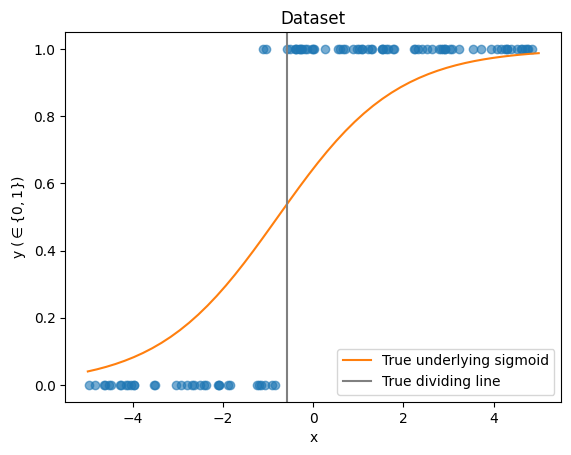

In [44]:
# Plot dataset

fig, ax = plt.subplots()
ax.plot(data_x, data_y_disc, 'o', alpha=0.6)

# Plot underlying sigmoid
x_vals = np.linspace(-5, 5, 50).reshape(50, 1)
x_vals_aug = np.hstack((np.ones((50, 1)), x_vals))
y_vals = np.apply_along_axis(h_true, 1, x_vals_aug)
ax.plot(x_vals, y_vals, label="True underlying sigmoid")
ax.axvline(-1*theta_true[0], 0, 1, color='grey', label="True dividing line")

ax.set_xlabel("x")
ax.set_ylabel("y ($\in \{0,1\}$)")
ax.set_title("Dataset")
ax.legend()
plt.show()

In [47]:
# Define cost function

def h(_x, _theta):
    return g(_theta.T @ _x)

def cost(_theta):
    output = 0
    for i in range(dataset_size):
        output += np.pow( h(data_x_aug[i], _theta) - data_y_noisy[i] , 2)
    output = 0.5 * output
    return output

In [52]:
# Run Stochastic Linear Regression Algorithm

# initialise variables
num_iters = 10000
alpha = 0.005
theta = np.array([0, 0])
theta_record = np.zeros((num_iters+1, 2))     # Record of all estimates of theta

theta_record[0] = theta

%time
# Run main loop
# Looping over training data until num_iters total steps have been taken
iter_count = 1
while (iter_count <= num_iters):
    j = iter_count % data_x.shape[0]
    theta = theta + alpha * (data_y_noisy[j] - h(data_x_aug[j]), theta.T) * data_x_aug[j]
    theta_record[iter_count] = theta
    iter_count += 1


print("Guess: \n", theta)
print("True value: \n", theta_true)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.01 μs
Guess: 
 [0.6205591  0.71616979]
True value: 
 [[0.59179917]
 [0.75330049]]


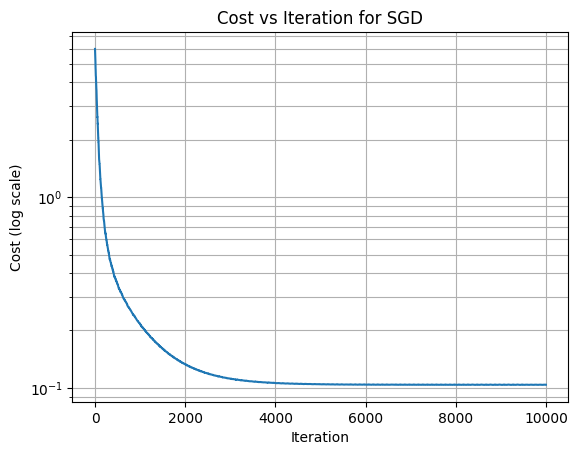

In [53]:
# Plot training process

# Plot of cost against training iteration
cost_record = np.array([cost(t.T) for t in theta_record])

fig, ax = plt.subplots()
ax.plot(np.arange(num_iters+1), cost_record)
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost (log scale)")
ax.set_title("Cost vs Iteration for SGD")
ax.set_yscale('log')
ax.grid(True, which='both')
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:21: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_986729/4010851011.py:21: SyntaxWarning: invalid escape sequence '\i'
  ax.set_ylabel("y ($\in \{0,1\}$)")


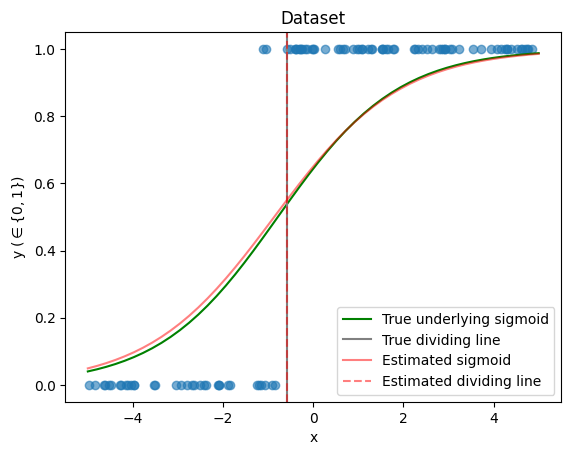

In [59]:
# Plot result against dataset

fig, ax = plt.subplots()
ax.plot(data_x, data_y_disc, 'o', alpha=0.6)

# Plot underlying sigmoid function
x_vals = np.linspace(-5, 5, 50).reshape(50, 1)
x_vals_aug = np.hstack((np.ones((50, 1)), x_vals))
y_vals = np.apply_along_axis(h_true, 1, x_vals_aug)
ax.plot(x_vals, y_vals, label="True underlying sigmoid", color='green')
ax.axvline(-1*theta_true[0], 0, 1, color='grey', label="True dividing line")

# Plot estimated sigmoid function
x_vals = np.linspace(-5, 5, 50).reshape(50, 1)
x_vals_aug = np.hstack((np.ones((50, 1)), x_vals))
y_vals = np.apply_along_axis(h, 1, x_vals_aug, theta)
ax.plot(x_vals, y_vals, label="Estimated sigmoid", color='red', alpha=0.5)
ax.axvline(-1*theta_true[0], 0, 1, ls='--', color='red', label="Estimated dividing line", alpha=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y ($\in \{0,1\}$)")
ax.set_title("Dataset")
ax.legend()
plt.show()